In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [19]:
service = Service(executable_path="chromedriver.exe")
driver = webdriver.Chrome(service=service)

driver.get("https://www.cars24.com/buy-used-honda-cars-mumbai/")
time.sleep(10)

last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

cars = driver.find_elements(By.CLASS_NAME, "styles_contentWrap__9oSrl")

data = []
for car in cars:
    try:
        full_name = car.find_element(By.CLASS_NAME, "sc-braxZu").text.strip()
        model = full_name.split()[0]
        name = " ".join(full_name.split()[1:])

        p_tags = car.find_elements(By.TAG_NAME, "p")
        km = p_tags[0].text.strip() if len(p_tags) > 0 else "KM not found"
        fuel = p_tags[1].text.strip() if len(p_tags) > 1 else "Fuel not found"
        transmission = p_tags[2].text.strip() if len(p_tags) > 2 else "Transmission not found"
        owners = p_tags[3].text.strip() if len(p_tags) > 3 else "Owner info not found"

        price_tag = car.find_element(By.XPATH, ".//div[contains(@class, 'styles_priceWrap')]/p").text.strip()
        location_tag = car.find_element(By.CLASS_NAME, "styles_ellipsis__uatjG").text.strip()
        location = location_tag.split()[0]


        
        data.append({
            "Model": model,
            "Name": name,
            "KM Driven": km,
            "Fuel": fuel,
            "Transmission": transmission,
            "Owners": owners,
            "Price": price_tag,
            "Location": location
        })
    except Exception:
        continue

driver.quit()

df = pd.DataFrame(data)

In [ ]:


df = pd.read_csv("Cars_Honda.csv")

# Cleaned Location
#df["Location"] = df["Location"].str.replace(",", "", regex=False)

df


,Model,Name,KM Driven,Fuel,Transmission,Owners,Price,Location
0,2018,Honda WR-V,34.19k km,Petrol,Manual,2nd owner,₹5.46 lakh,Seawood
1,2018,Honda City,40.19k km,Petrol,Manual,1st owner,₹5.98 lakh,Korum
2,2020,Honda Jazz,31.38k km,Petrol,Auto,2nd owner,₹5.97 lakh,Kandivali
3,2019,Honda Amaze,25.72k km,Petrol,Auto,2nd owner,₹5.05 lakh,Mulund
4,2018,Honda BR-V,69.40k km,Petrol,Manual,1st owner,₹5.95 lakh,Regency
5,2018,Honda Amaze,43.44k km,Petrol,Auto,1st owner,₹4.06 lakh,Seawood
6,2019,Honda Amaze,51.24k km,CNG,Manual,2nd owner,₹5.50 lakh,Kandivali
7,2015,Honda Jazz,66.96k km,Petrol,Manual,2nd owner,₹3.33 lakh,Seawood
8,2018,Honda WR-V,35.30k km,Petrol,Manual,1st owner,₹4.90 lakh,Goregaon
9,2023,Honda ELEVATE,9.07k km,Petrol,Manual,1st owner,₹13.60 lakh,Mulund


In [ ]:
#cleaned Price 
#df["Price"] = df["Price"].str.replace("lakh", "", regex=False)
#df["Price"] = df["Price"].str.replace("L", "", regex=False)
#df["Price"] = df["Price"].str.replace("₹", "", regex=False)
#df["Price"] = df["Price"].str.strip().astype(float) * 100000


df

,Model,Name,KM Driven,Fuel,Transmission,Owners,Price,Location
0,2018,Honda WR-V,34.19k km,Petrol,Manual,2nd owner,546000.0,Seawood
1,2018,Honda City,40.19k km,Petrol,Manual,1st owner,598000.0,Korum
2,2020,Honda Jazz,31.38k km,Petrol,Auto,2nd owner,597000.0,Kandivali
3,2019,Honda Amaze,25.72k km,Petrol,Auto,2nd owner,505000.0,Mulund
4,2018,Honda BR-V,69.40k km,Petrol,Manual,1st owner,595000.0,Regency
5,2018,Honda Amaze,43.44k km,Petrol,Auto,1st owner,406000.0,Seawood
6,2019,Honda Amaze,51.24k km,CNG,Manual,2nd owner,550000.0,Kandivali
7,2015,Honda Jazz,66.96k km,Petrol,Manual,2nd owner,333000.0,Seawood
8,2018,Honda WR-V,35.30k km,Petrol,Manual,1st owner,490000.0,Goregaon
9,2023,Honda ELEVATE,9.07k km,Petrol,Manual,1st owner,1360000.0,Mulund


In [50]:
# Cleaned KM Driven
#df["KM Driven"] = df["KM Driven"].str.replace("k km", "", regex=False)
#df["KM Driven"] = df["KM Driven"].str.replace("k", "", regex=False)

#df["KM Driven"] = df["KM Driven"].str.strip().astype(float) * 1000


df
#df.to_csv("Cars_Honda.csv", index=False)

,Model,Name,KM Driven,Fuel,Transmission,Owners,Price,Location
0,2018,Honda WR-V,34190.0,Petrol,Manual,2nd owner,546000.0,Seawood
1,2018,Honda City,40190.0,Petrol,Manual,1st owner,598000.0,Korum
2,2020,Honda Jazz,31380.0,Petrol,Auto,2nd owner,597000.0,Kandivali
3,2019,Honda Amaze,25720.0,Petrol,Auto,2nd owner,505000.0,Mulund
4,2018,Honda BR-V,69400.0,Petrol,Manual,1st owner,595000.0,Regency
5,2018,Honda Amaze,43440.0,Petrol,Auto,1st owner,406000.0,Seawood
6,2019,Honda Amaze,51240.0,CNG,Manual,2nd owner,550000.0,Kandivali
7,2015,Honda Jazz,66960.0,Petrol,Manual,2nd owner,333000.0,Seawood
8,2018,Honda WR-V,35300.0,Petrol,Manual,1st owner,490000.0,Goregaon
9,2023,Honda ELEVATE,9070.0,Petrol,Manual,1st owner,1360000.0,Mulund


C:\Users\swapn\AppData\Local\Temp\ipykernel_20936\1993691556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=df, palette='viridis')


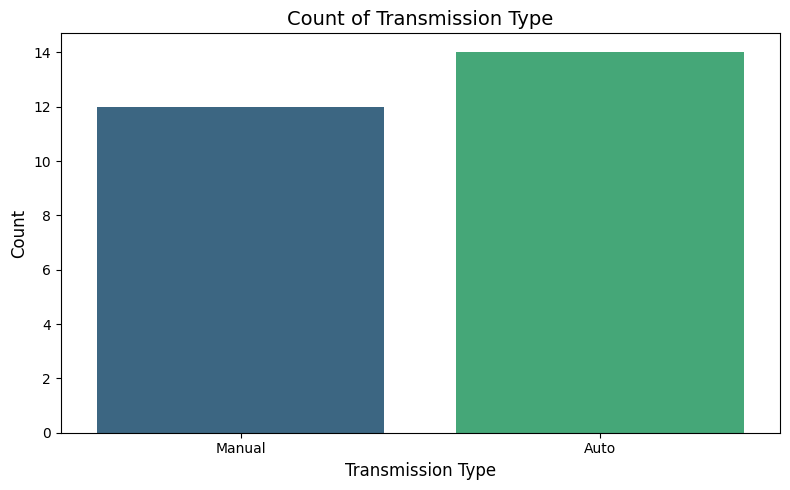

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.countplot(x='Transmission', data=df, palette='viridis')

plt.title('Count of Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

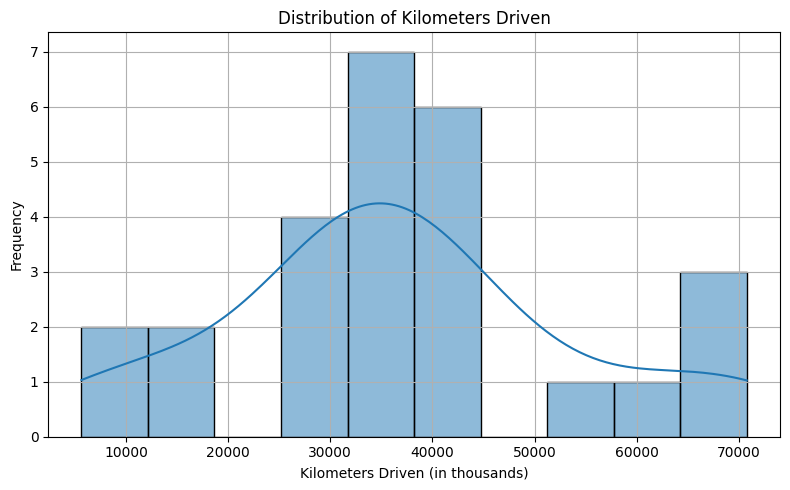

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(df['KM Driven'], bins=10, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven (in thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Price (in Lakh ₹)')

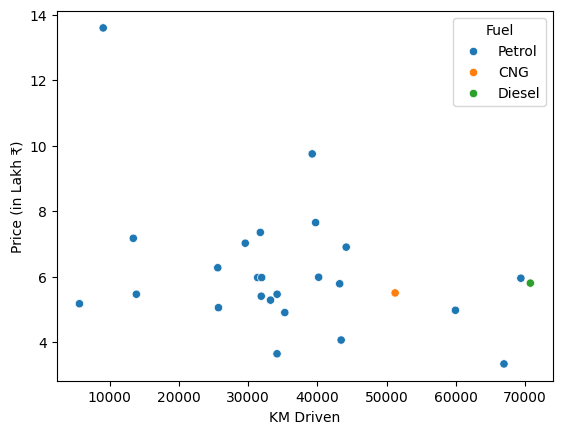

In [24]:
z= df['Price'] / 100000

sns.scatterplot(x='KM Driven', y=z, data=df,hue='Fuel')
plt.ylabel('Price (in Lakh ₹)')


C:\Users\swapn\AppData\Local\Temp\ipykernel_20936\764447777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index, palette='coolwarm')


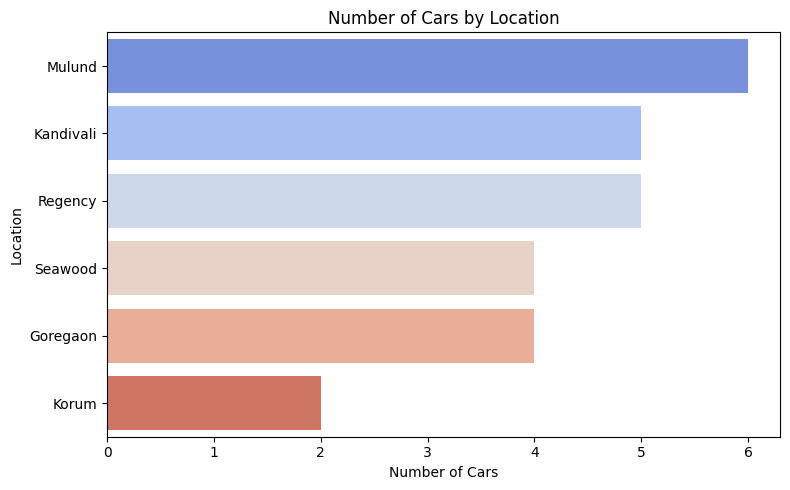

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index, palette='coolwarm')
plt.title('Number of Cars by Location')
plt.xlabel('Number of Cars')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


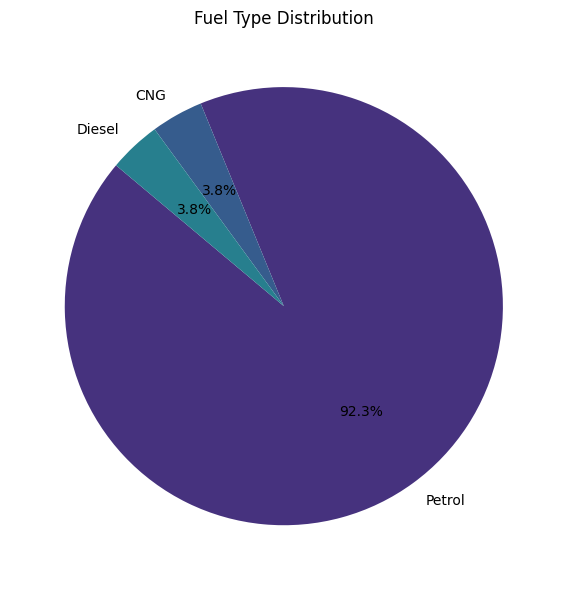

In [33]:
fuel_counts = df['Fuel'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Fuel Type Distribution')
plt.tight_layout()
plt.show()

C:\Users\swapn\AppData\Local\Temp\ipykernel_20936\2516149482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Owners', data=df, palette='rocket')


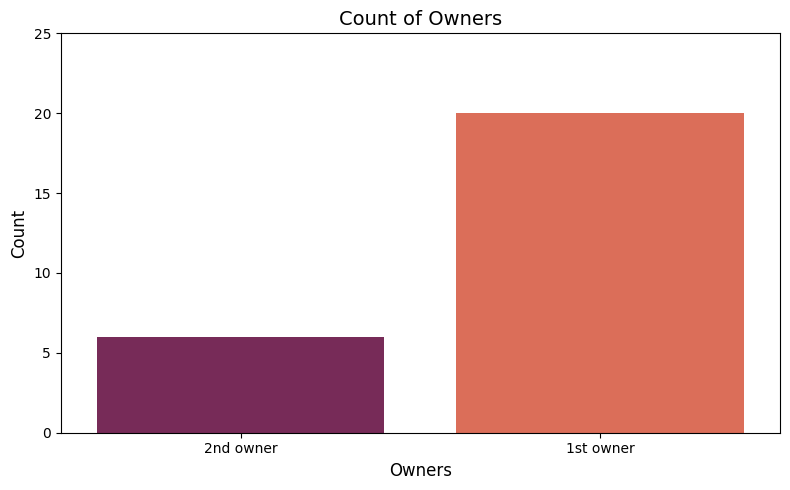

In [35]:

plt.figure(figsize=(8,5))
sns.countplot(x='Owners', data=df, palette='rocket')

plt.title('Count of Owners', fontsize=14)
plt.xlabel('Owners', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(range(0, 30, 5))
plt.tight_layout()
plt.show()